In [ ]:
import sqlalchemy
!pip install pymysql
from sqlalchemy import create_engine
import pandas as pd 
from pandas import read_csv


     |████████████████████████████████| 43 kB 1.4 MB/s 


In [ ]:
from datetime import datetime 
def parser(x):
  return datetime.strptime(x,'%d-%m-%y')
data = read_csv('/content/drive/MyDrive/inventory control',header=0,parse_dates=[0],squeeze=True,date_parser=parser)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   invoice_date           28482 non-null  datetime64[ns]
 1   job_card_date          28482 non-null  object        
 2   business_partner_name  28482 non-null  object        
 3   vehicle_no             28482 non-null  object        
 4   vehicle_model          28482 non-null  object        
 5   current_km_reading     28482 non-null  int64         
 6   invoice_line_text      28448 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.5+ MB


In [ ]:
data

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,2017-05-30,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,2017-06-02,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,2017-06-02,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,2017-06-02,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,2017-06-02,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL
...,...,...,...,...,...,...,...
28477,2019-01-06,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,SPROCKET RUBBER
28478,2019-01-06,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,CLUTCH CABLE
28479,2019-01-06,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,OIL FILTER
28480,2019-01-06,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,DISC OIL


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data[data.duplicated()].count()

invoice_date             383
job_card_date            383
business_partner_name    383
vehicle_no               383
vehicle_model            383
current_km_reading       383
invoice_line_text        367
dtype: int64

In [ ]:
data.isnull().sum()

invoice_date              0
job_card_date             0
business_partner_name     0
vehicle_no                0
vehicle_model             0
current_km_reading        0
invoice_line_text        34
dtype: int64

In [ ]:
# Dropping the null values

print('shape of data before droping null values =',data.shape)
data.dropna(inplace=True)
print('shape of data after droping null values =',data.shape)

shape of data before droping null values = (28482, 7)
shape of data after droping null values = (28448, 7)


In [ ]:
data.isnull().sum()

invoice_date             0
job_card_date            0
business_partner_name    0
vehicle_no               0
vehicle_model            0
current_km_reading       0
invoice_line_text        0
dtype: int64

In [ ]:
# Highest freq of element in invoice_line_text column

for j in ['invoice_date']:
    print(f'unique[{j}] count:',data[j].describe())

unique[invoice_date] count: count                   28448
unique                    555
top       2018-12-01 00:00:00
freq                      179
first     2017-05-30 00:00:00
last      2019-01-06 00:00:00
Name: invoice_date, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


In [ ]:
list = data['invoice_date']
list1 = [list.value_counts()]
list1

[2018-12-01    179
 2018-12-04    167
 2018-11-30    148
 2018-11-05    136
 2018-09-05    133
              ... 
 2017-12-27      5
 2018-01-15      5
 2018-02-18      4
 2017-07-09      1
 2017-05-30      1
 Name: invoice_date, Length: 555, dtype: int64]

In [ ]:
columns = ['ds','y'];
data = []
for column in list1:
    data.append({'y':column[1],'ds':column[0]})
data = pd.DataFrame(data)


In [ ]:
data1 = pd.DataFrame(list1).T
data1.head()

,invoice_date
2018-12-01,179
2018-12-04,167
2018-11-30,148
2018-11-05,136
2018-09-05,133


In [ ]:
data1['index'] = data1.index

In [ ]:
data1.reset_index(inplace=True)
data1.head(10)

,level_0,invoice_date,index
0,2018-12-01,179,2018-12-01
1,2018-12-04,167,2018-12-04
2,2018-11-30,148,2018-11-30
3,2018-11-05,136,2018-11-05
4,2018-09-05,133,2018-09-05
5,2018-10-06,131,2018-10-06
6,2018-10-16,128,2018-10-16
7,2018-11-27,123,2018-11-27
8,2017-06-10,121,2017-06-10
9,2018-09-04,119,2018-09-04


In [ ]:
data1.drop('level_0',axis=1,inplace=True)
data1.head(2)

,invoice_date,index
0,179,2018-12-01
1,167,2018-12-04


In [ ]:
col = data1.columns.to_list()

In [ ]:
col

['invoice_date', 'index']

In [ ]:
col = col[-1:]+col[:-1]
col

['index', 'invoice_date']

In [ ]:
data1 = data1[col]
data1.head(10)

,index,invoice_date
0,2018-12-01,179
1,2018-12-04,167
2,2018-11-30,148
3,2018-11-05,136
4,2018-09-05,133
5,2018-10-06,131
6,2018-10-16,128
7,2018-11-27,123
8,2017-06-10,121
9,2018-09-04,119


In [ ]:
data1.rename({'invoice_date':'y','index':'ds'},axis = 1,inplace=True)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      555 non-null    datetime64[ns]
 1   y       555 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.8 KB


In [ ]:
data1.head()

,ds,y
0,2018-12-01,179
1,2018-12-04,167
2,2018-11-30,148
3,2018-11-05,136
4,2018-09-05,133


In [ ]:
!pip install prophet

from prophet import Prophet

     |████████████████████████████████| 65 kB 3.2 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 216 kB 34.1 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641027 sha256=cde93dd7eb5e55278344c2ad06e79fadbd2140de9b4319a2d2c72d451f9f974b
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
model= Prophet()
model.fit(data1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
915,2020-01-02
916,2020-01-03
917,2020-01-04
918,2020-01-05
919,2020-01-06


In [ ]:
future.head()

,ds
0,2017-05-30
1,2017-05-31
2,2017-06-01
3,2017-06-02
4,2017-06-03


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() 

,ds,yhat,yhat_lower,yhat_upper
915,2020-01-02,110.821268,81.924161,138.773429
916,2020-01-03,109.109434,79.689462,138.391693
917,2020-01-04,127.418515,100.138491,156.319670
918,2020-01-05,88.701999,59.172902,116.279054
919,2020-01-06,111.165883,84.370369,139.316159


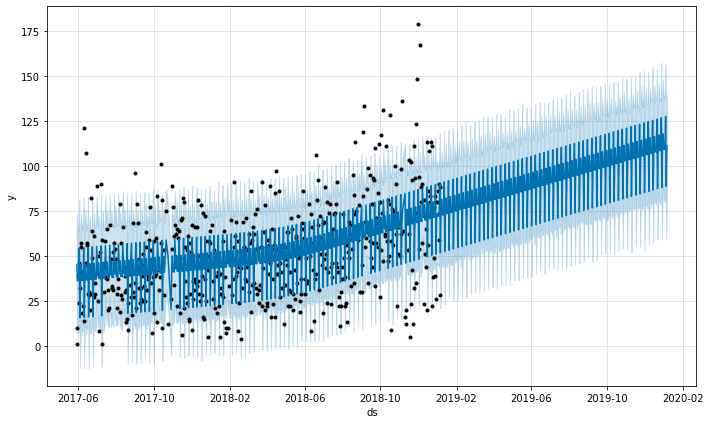

In [ ]:
fig1 = model.plot(forecast)


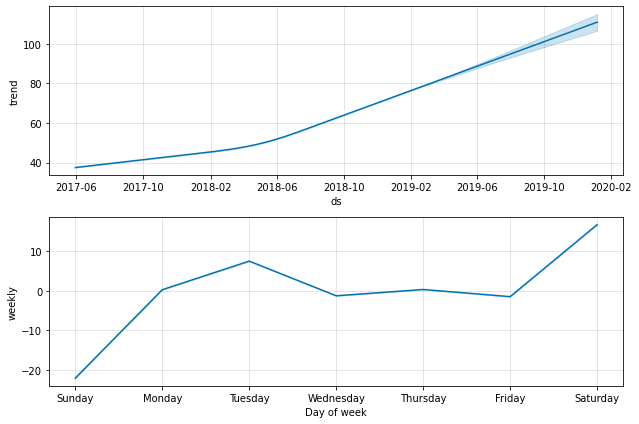

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
plot_components_plotly(model, forecast)


In [ ]:
data1.to_csv('inv.csv',index=False)